In [ ]:
# Name: Nigar Ahmadova
# Student ID: 101431281
# Assignment03.ipynb
# House Price Prediction using Machine Learning
# In this assignment, we build a machine learning model to predict house prices for a Kaggle competition, aiming for a score below 0.3.

In [29]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
# Load the training and testing data using Pandas.
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [33]:
# Inspect the first few rows to understand the dataset structure.
train_data.head()
train_data.info()  # Check for data types and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# 10 features that can be important for predicting house prices:
# 1.OverallQual: Rates the overall material and finish of the house (integer).
# 2.GrLivArea: Above grade (ground) living area square feet (integer).
# 3.GarageCars: The size of the garage in terms of car capacity (integer).
# 4.TotalBsmtSF: Total square feet of basement area (integer).
# 5.FullBath: Number of full bathrooms above grade (integer).
# 6.YearBuilt: Original construction year (integer).
# 7.YearRemodAdd: Remodel year (integer).
# 8.1stFlrSF: First Floor square feet (integer).
# 9.Fireplaces: Number of fireplaces (integer).
# 10.TotRmsAbvGrd: Total rooms above grade, excluding bathrooms (integer).

In [35]:
# Use selected features to create a feature matrix (X) and target variable (y).
# Define features and target
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 
                     'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'Fireplaces', 'TotRmsAbvGrd']

X = train_data[selected_features]
y = np.log(train_data['SalePrice'])  
  

In [37]:
# Handle missing values
X = train_data[selected_features].copy()  
X.fillna(X.mean(), inplace=True)  

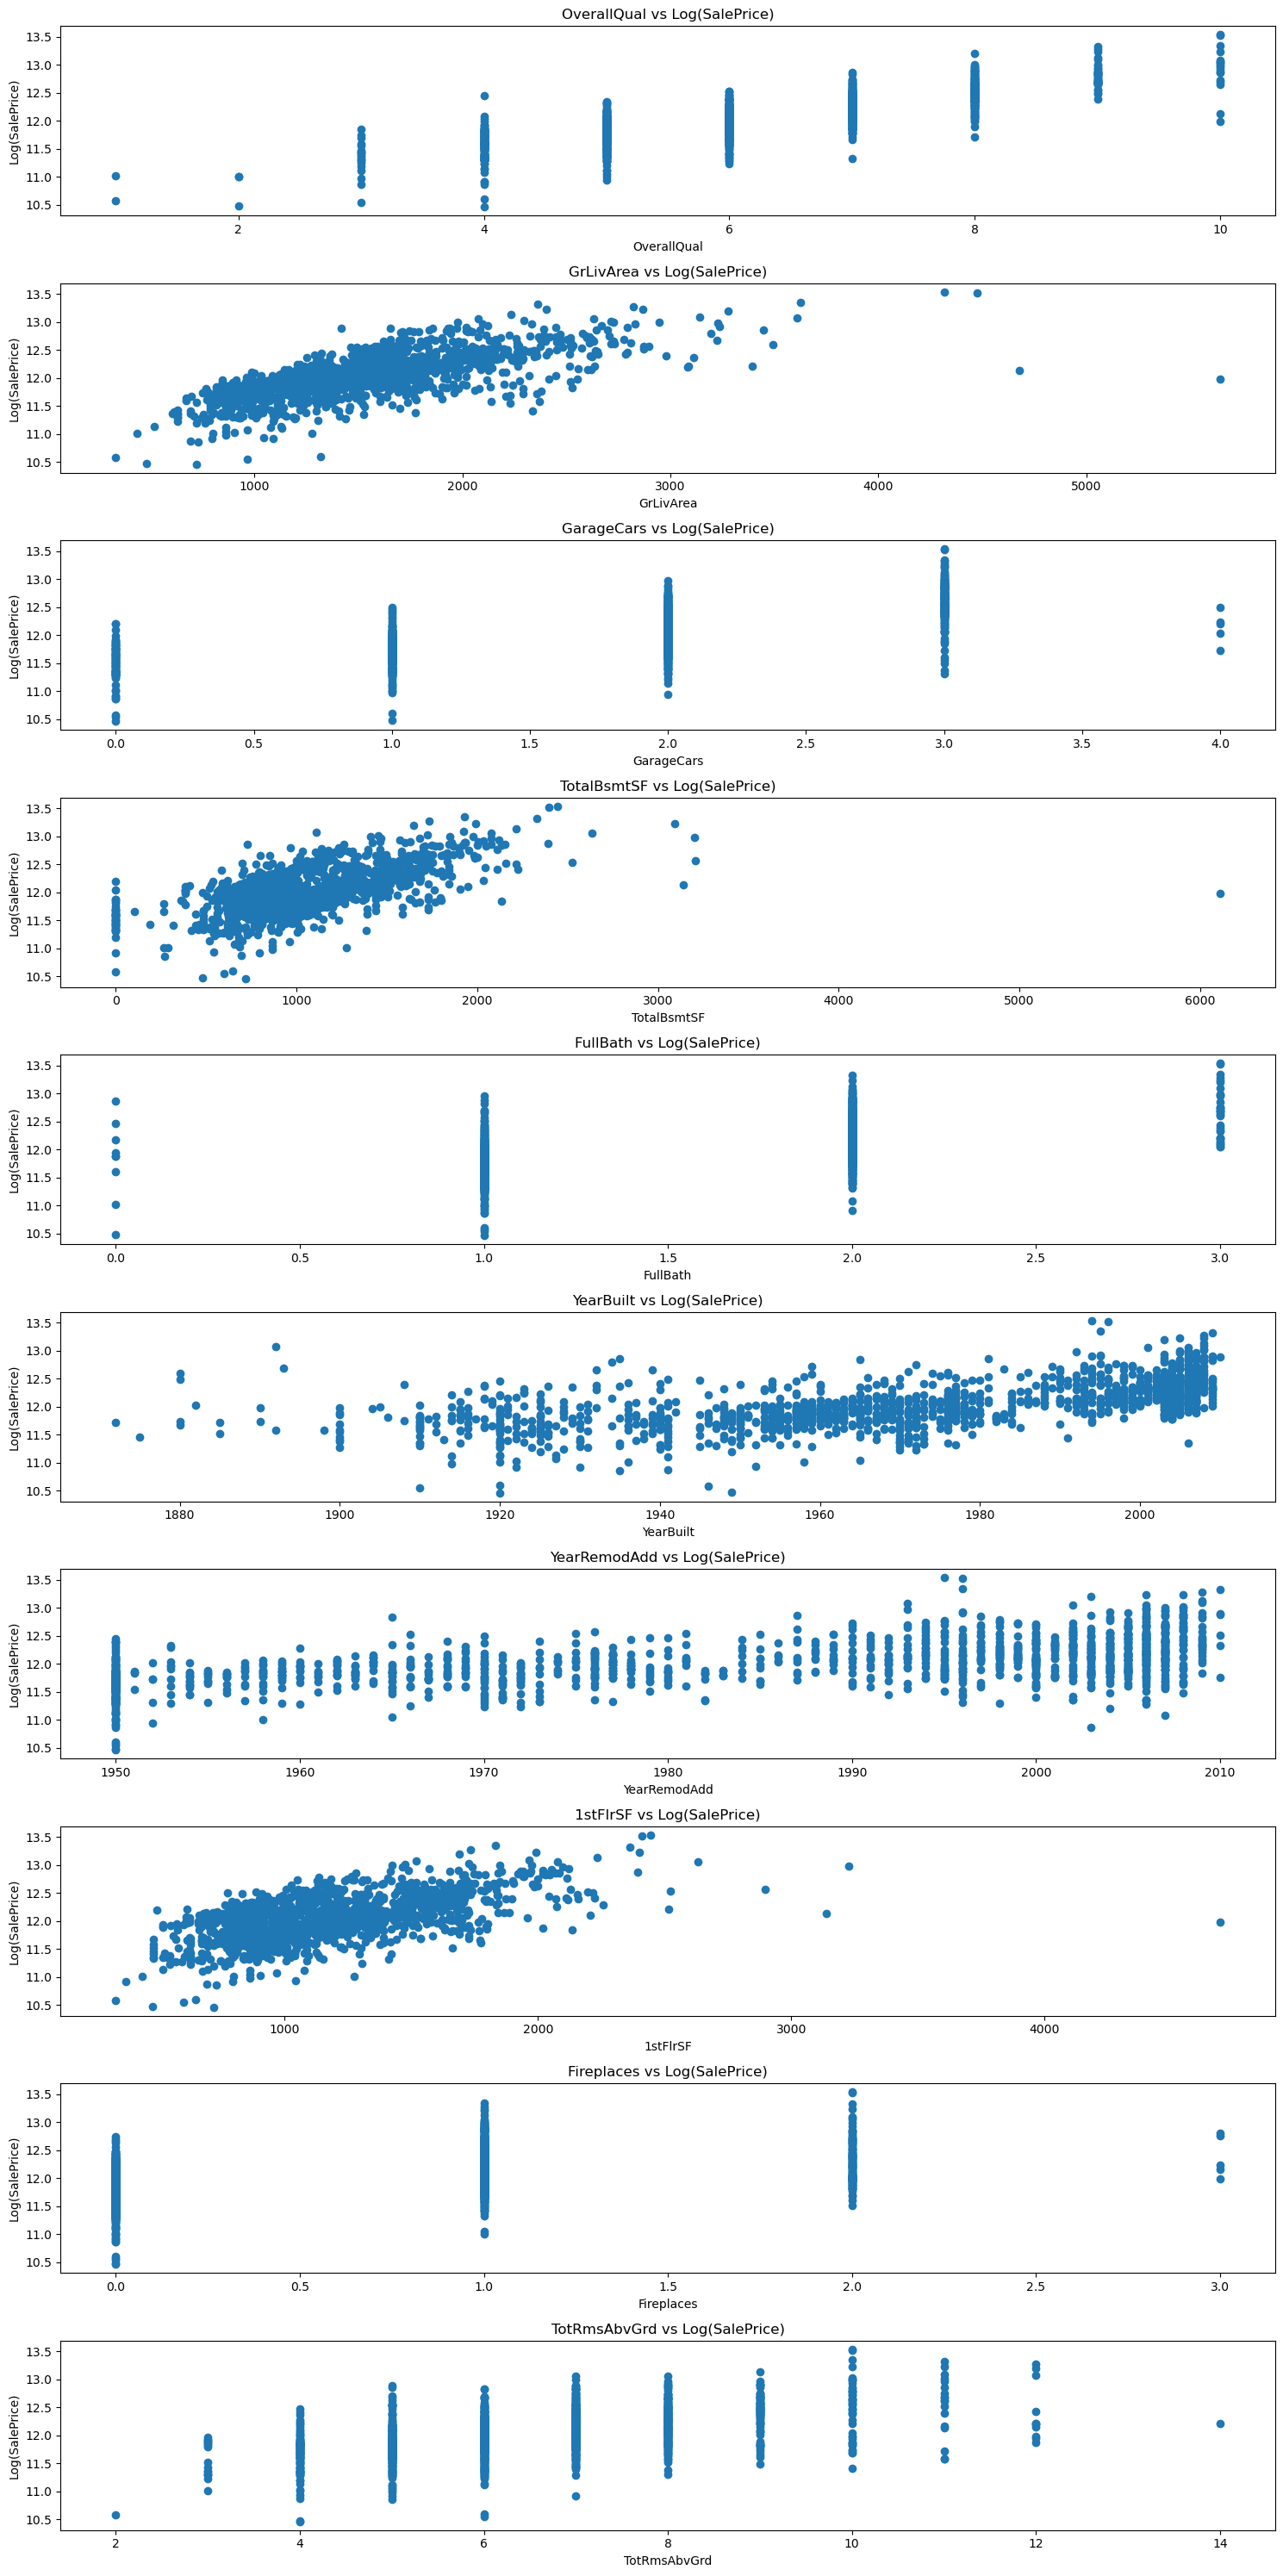

In [39]:
# Plot each feature against LogSalePrice to observe relationships.
plt.figure(figsize=(15, 30))  
for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 1, i)  
    plt.scatter(X[feature], y)  
    plt.title(f"{feature} vs Log(SalePrice)")
    plt.xlabel(feature)
    plt.ylabel("Log(SalePrice)")

plt.tight_layout()
plt.show()

In [41]:
# Split X and y into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Use a linear regression model to train on the log-transformed target variable.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict the log-transformed target variable on the validation set and calculate the Root Mean Square Error (RMSE) to measure model performance.
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE:", rmse)

RMSE: 0.1680866153600921


In [47]:
# Make Predictions on the Test Set.
# Use the same selected features from the test dataset.
X_test = test_data[selected_features].copy()  
X_test.fillna(X_test.mean(), inplace=True)  

In [49]:
# Predict on the test set using the model and reverse the log transformation (using np.exp) to get the actual sale prices.
test_predictions_log = model.predict(X_test)
test_predictions = np.exp(test_predictions_log)  # Reverse log transformation

In [51]:
# Create submission file:
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)